In [1]:
from Library import Algorithm, Cloud, Manifolds
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
L1 = 17.3
L2 = 7.8
L3 = 4.5


def inverse(x, t):
    y = np.zeros((2, 3))
    y[0] = x.copy()
    y[1] = x.copy()

    if(not np.isnan(x[0])):
        x_ = t[0] - L1*math.cos(x[0])
        y_ = t[1] - L1*math.sin(x[0])


        if(abs(x_**2 + y_**2 - L2**2 - L3 ** 2) / (2*L2*L3) > 1):
            return y

        q21 = np.arccos((x_**2 + y_**2 - L2**2 - L3 ** 2) / (2*L2*L3))
        q11 = np.arctan2(y_, x_) - np.arctan2(L3*math.sin(q21), L2 + L3*math.cos(q21))

        q22 = -q21
        q12 = np.arctan2(y_, x_) + np.arctan2(L3*math.sin(q22), L2 + L3*math.cos(q22))

        y[0, 1] = q11
        y[0, 2] = q11 + q21

        y[1, 1] = q12
        y[1, 2] = q12 + q22


        
    elif(not np.isnan(x[1])):
        x_ = t[0] - L2*math.cos(x[1])
        y_ = t[1] - L2*math.sin(x[1])

        if(abs((x_**2 + y_**2 - L1**2 - L3 ** 2) / (2*L1*L3)) > 1):
            return y

        q21 = np.arccos((x_**2 + y_**2 - L1**2 - L3 ** 2) / (2*L1*L3))
        q11 = np.arctan2(y_, x_) - np.arctan2(L3*math.sin(q21), L1 + L3*math.cos(q21))

        q22 = -q21
        q12 = np.arctan2(y_, x_) + np.arctan2(L3*math.sin(q22), L1 + L3*math.cos(q22))

        y[0, 0] = q11
        y[0, 2] = q11 + q21

        y[1, 0] = q12
        y[1, 2] = q12 + q22

        if(q11 < 0 or q11 > 2.6):
            y[0, 0] = np.nan
        if(q12 < 0 or q12 > 2.6):
            y[1, 0] = np.nan

    else:
        x_ = t[0] - L3*math.cos(x[2])
        y_ = t[1] - L3*math.sin(x[2])

        if(abs((x_**2 + y_**2 - L1**2 - L2 ** 2) / (2*L1*L2)) > 1):
            return y

        q21 = np.arccos((x_**2 + y_**2 - L1**2 - L2 ** 2) / (2*L1*L2))
        q11 = np.arctan2(y_, x_) - np.arctan2(L2*math.sin(q21), L1 + L2*math.cos(q21))

        q22 = -q21
        q12 = np.arctan2(y_, x_) + np.arctan2(L2*math.sin(q22), L1 + L2*math.cos(q22))

        y[0, 0] = q11
        y[0, 1] = q11 + q21

        y[1, 0] = q12
        y[1, 1] = q12 + q22

        if(q11 < 0 or q11 > 2.6):
            y[0, 0] = np.nan
        if(q12 < 0 or q12 > 2.6):
            y[1, 0] = np.nan



    #print(x)
    #print(q1, q2)
    #print(y)

    return y


def Jx(x, t):
    J = np.zeros((2, 3))

    J[0, 0] = - L1*math.sin(x[0])
    J[1, 0] = L1*math.cos(x[0])

    J[0, 1] = - L2*math.sin(x[1])
    J[1, 1] = L2*math.cos(x[1])

    J[0, 2] = - L3*math.sin(x[2])
    J[1, 2] = L3*math.cos(x[2])

    return J

def Jt(x, t):
    J = np.zeros((2, 2))
    J[0, 0] = 1
    J[1, 1] = 1

    return J


In [3]:
N = 40

h = 2*6.14/N

xs = [np.linspace(0, 2.6, int(N / 2.41)), np.linspace(-3.14, 3.14, N), np.linspace(-3.14, 3.14, N)]

t = Cloud.carteisan_product([np.linspace(-30, 30, N // 2), np.linspace(-30, 30, N // 2)])

dx = np.array([h, h, h])

oc = 4
om = 30

#slices = Cloud.GetSlicesInverse(xs, t, inverse, 2)
#cloud = Cloud.Slices2Pointcloud(slices)

In [4]:
slices = Cloud.GetSlicesInverse(xs, t, inverse, 2)
20
ks, trees, manifolds, mappings = Manifolds.ClusterSlices(slices, 0.1, oc)


100%|██████████| 100/100 [00:00<00:00, 439.42it/s]


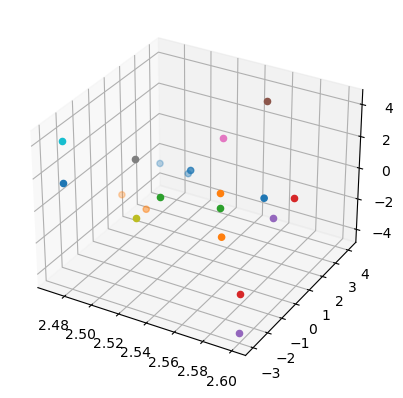

In [5]:
id = 2050

for i, m in enumerate(manifolds):
    if len(m) > 1:
        id = i
        break


#3d plot

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


for m in manifolds[id]:
    m = list(m)
    m = np.array(m)

    ax.scatter(m[:, 0], m[:, 1], m[:, 2], 'b')

plt.show()

In [6]:


barriers, markers = Algorithm.GetBordersInverse(xs, t, dx, inverse, 2, Jx, Jt, oc, om)

100%|██████████| 100/100 [00:00<00:00, 357.39it/s]
100it [00:01, 60.75it/s]


In [7]:
barriers = np.array(barriers)

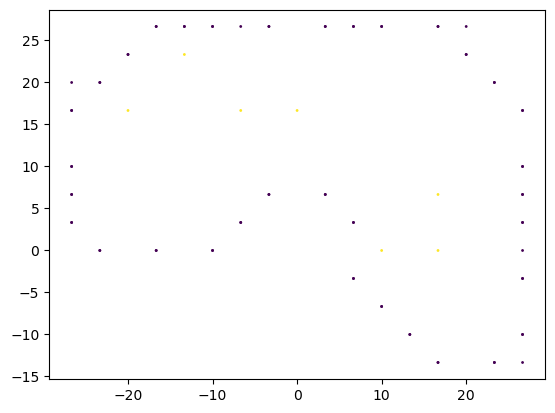

In [8]:
fig = plt.figure()

plt.scatter(barriers[:, 0], barriers[:, 1], c = markers, s = 1)
plt.show()